## Search Tree -> Similar Words

In [4]:
csv_path = 'E:\datasets_nlp_lesson\export_sql_1558435\sqlResult_1558435.csv'

In [5]:
import pandas as pd 

In [6]:
content = pd.read_csv(csv_path, encoding='gb18030')


In [7]:
content = content.fillna('')## fillna 填充缺失数据-NaN,fillna(),括号里面的参数可以是常数等

In [8]:
news_content = content['content'].tolist()

In [9]:
import jieba
import re

In [10]:
def cut(string): return ' '.join(jieba.cut(string))

In [11]:
cut('这是一个测试')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\XIONGF~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.176 seconds.
Prefix dict has been built succesfully.


'这是 一个 测试'

In [12]:
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [13]:
token('这是一个测试\n\n\n')

['这是一个测试']

In [14]:
# news_content

In [15]:
news_content = [token(n) for n in news_content]

In [16]:
# news_content

In [17]:
news_content = [' '.join(n) for n in news_content]

In [18]:
# news_content

In [19]:
news_content = [cut(n) for n in news_content]

In [20]:
# news_content

In [21]:
with open('news-sentences-cut.txt', 'w', encoding='utf-8') as f:
    for n in news_content:
        f.write(n + '\n')

In [22]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

C:\Users\xiongfeng\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\Users\xiongfeng\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [23]:
"""用LineSentence类读取文件，用Word2Vec构建模型（LineSentence('news-sentences-cut.txt')这个是第一个参数，就是我们要分析的语料，可以是列表，也可以从文件中遍历读出等）"""
""" size=35表示词向量的维度，默认是100，它的大小可以根据语料库的大小来决定；workers=8是使用多少个线程来处理"""
news_word2ve = Word2Vec(LineSentence('news-sentences-cut.txt'), size=35, workers=8)  

In [24]:
news_word2ve

In [25]:
news_word2ve.most_similar('葡萄牙', topn=20)

C:\Users\xiongfeng\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('克罗地亚', 0.8522515296936035),
 ('意大利', 0.8483116030693054),
 ('捷克', 0.8433470726013184),
 ('比利时', 0.818083643913269),
 ('摩洛哥', 0.8158619403839111),
 ('奥地利', 0.8098350763320923),
 ('乌拉圭', 0.7939110398292542),
 ('拉脱维亚', 0.7929134368896484),
 ('巴塞罗那', 0.7884945273399353),
 ('科特迪瓦', 0.7871353626251221),
 ('比什凯克', 0.7859848737716675),
 ('瑞士', 0.7830488681793213),
 ('罗马尼亚', 0.7820745706558228),
 ('里斯本', 0.7660828828811646),
 ('西班牙', 0.7608464360237122),
 ('罗马', 0.7592504024505615),
 ('保加利亚', 0.7548761367797852),
 ('瑞典', 0.7508506774902344),
 ('斯洛文尼亚', 0.75029456615448),
 ('索', 0.7493390440940857)]

## More Data， Better Result
1. 分词的问题
2. **数据量**，数据越多，效果越好，维基百科加进来，那么同义词就要好很多

In [22]:
# news_word2ve.most_similar('捷克')

In [23]:
# news_word2ve.wv.most_similar('说')

In [24]:
# news_word2ve.wv.most_similar('认为')

In [29]:
from collections import defaultdict

In [30]:


# def get_related_words(initial_words, model):
#     """
#     @initial_words are initial words we already know
#     @model is the word2vec model
#     """
    
#     unseen = initial_words
    
#     seen = defaultdict(int)
    
#     max_size = 500  # could be greater
    
#     while unseen and len(seen) < max_size:
#         if len(seen) % 50 == 0: 
#             print('seen length : {}'.format(len(seen)))
            
#         node = unseen.pop(0)
        
#         new_expanding = [w for w, s in model.most_similar(node, topn=20)]
        
#         unseen += new_expanding
        
#         seen[node] += 1
        
#         # optimal: 1. score function could be revised
#         # optimal: 2. using dymanic programming to reduce computing time
    
#     return seen

In [31]:
len(news_word2ve.wv.vocab)

97009

In [32]:
# related_words = get_related_words(['说','表示'], news_word2ve)

In [33]:
# sorted(related_words.items(),key=lambda x: x[1],reverse=True)

# TFIDF Key words

In [34]:
news_content[0]

'此外       自   本周       6   月   12   日       起       除   小米   手机   6   等   15   款   机型   外       其余   机型   已   暂停   更新   发布       含   开发   版       体验版   内测       稳定版   暂不受   影响       以   确保   工程师   可以   集中   全部   精力   进行   系统优化   工作       有人   猜测   这   也   是   将   精力   主要   用到   MIUI       9   的   研发   之中       MIUI       8   去年   5   月   发布       距今已有   一年   有余       也   是   时候   更新换代   了       当然       关于   MIUI       9   的   确切   信息       我们   还是   等待   官方消息'

In [40]:
import math

In [55]:
"""某个词在整个数据集中的出现次数-词频数"""
def document_frequency(word):
    return sum(1 for n in news_content if word in n)

"""总词数/词频数 再取log ==>所以某个词在数据集中词频数越高，那么他的idf就越低
   ==>因为他经常在每一段小文本都出现，所以显得不那么重要"""
def idf(word):
    """gets the inversed document frequency"""
    return math.log10(len(news_content) / document_frequency(word))

"""获取一个词在数据集子文本中出现的次数"""
def tf(word, document):
    """gets the term frequency of a @word in a @document"""
    words = document.split()
    return sum(1 for w in words if w == word)

"""计算出tf*idf的值，tfidf越大，说明它是关键字的可能性越大"""
def get_keywords_of_a_document(document):
    words = set(document.split())
    
    tfidf = [
        (w, tf(w, document) * idf(w)) for w in words
    ]
    
    tfidf = sorted(tfidf, key=lambda x: x[1], reverse=True)
    
    return tfidf

In [42]:
document_frequency('的')

70342

In [43]:
idf('的') < idf('小米')

True

In [21]:
# content['content'][11]

In [45]:
tf('银行', news_content[11])

6

In [46]:
tf('创业板', news_content[11])

6

In [47]:
idf('创业板')

2.506757120518876

In [48]:
idf('银行')

1.4550169427748936

In [49]:
idf('短期')

1.9923664854640575

In [50]:
document_frequency('创业板')

279

In [51]:
document_frequency('银行')

3143

In [52]:
tf('短期', news_content[11])

3

In [25]:
# news_content[0]

In [56]:
"""%prun statement 通过cProfile执行statement，并打印分析器的输出结果"""
%prun get_keywords_of_a_document(news_content[0])

In [57]:
machine_new_keywords = get_keywords_of_a_document(news_content[101])

In [26]:
# news_content[101]

In [27]:
# get_keywords_of_a_document(news_content[101])

# wordcloud

#### 词云图是根据词的频率生成词云，词的大小表示概率的大小

In [62]:
import wordcloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [63]:
"""本来词云只能显示英文，下面这个工具显示中文"""
wc = wordcloud.WordCloud('E:\datasets_nlp_lesson\SourceHanSerifSC-Regular.otf')

In [64]:
%matplotlib inline

In [65]:
"""generate_from_frequencies适用于我已知词及其对应的词频是多少，不需要自动生成的情况下。
   接受的参数是字典形式
"""
help(wc.generate_from_frequencies)

Help on method generate_from_frequencies in module wordcloud.wordcloud:

generate_from_frequencies(frequencies, max_font_size=None) method of wordcloud.wordcloud.WordCloud instance
    Create a word_cloud from words and frequencies.
    
    Parameters
    ----------
    frequencies : dict from string to float
        A contains words and associated frequency.
    
    max_font_size : int
        Use this font-size instead of self.max_font_size
    
    Returns
    -------
    self



In [66]:
machine_new_keywords_dict = {w: score for w, score in machine_new_keywords}

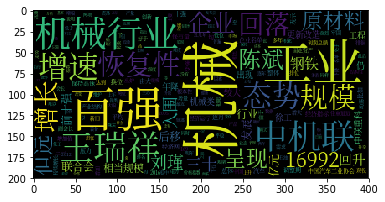

In [68]:
plt.imshow(wc.generate_from_frequencies(machine_new_keywords_dict))

In [69]:
shenzhen_social_news = get_keywords_of_a_document(news_content[4])

In [28]:
# shenzhen_social_news

In [73]:
police_mask = np.array(Image.open('E:\datasets_nlp_lesson\police.jpg'))

In [75]:
wordcloud_with_mask = wordcloud.WordCloud(
font_path='E:\datasets_nlp_lesson\SourceHanSerifSC-Regular.otf', mask=police_mask)

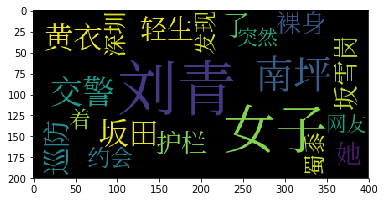

In [78]:
plt.imshow(wc.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

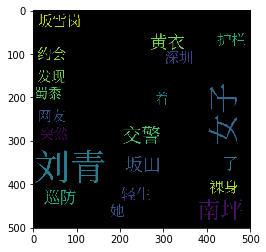

In [79]:
"""自定义背景图片的生成词云"""
# 具体请供参考：https://blog.csdn.net/fly910905/article/details/77763086
plt.imshow(wordcloud_with_mask.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

# TFIDF Vectorized

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
import random
from scipy.spatial.distance import cosine

In [85]:
"""TfidfVetorizer可以把原始文本转化为tdidf的特征矩阵"""
vectorized = TfidfVectorizer(max_features=10000)

In [29]:
# news_content[:10]

In [88]:
sample_num = 50000
sub_samples = news_content[:sample_num]

In [89]:
X = vectorized.fit_transform(sub_samples)  # fit_transform计算各个词语出现的次数

In [90]:
X.shape

(50000, 10000)

In [30]:
"""输出一个字典：key是单词，value是单词在矩阵vectorized中的位置"""
# vectorized.vocabulary_

'输出一个字典：key是单词，value是单词在矩阵vectorized中的位置'

In [92]:
X.toarray()  # 太稀疏了，以至于看起来都是0

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
"""get the positions which values are not zero 下面这个数组是不是0的位置"""
"""1. np.where(condition, x, y)满足条件condition，则输出x，不满足输出y
   2. np.where(condition)把满足条件condition的元素的坐标输出,坐标以tuple的形式给出，
   通常原数组有多少维，输出的tuple中就包含几个数组，分别对应符合条件元素的各维坐标。
"""
np.where(X[0].toarray())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([  35,   46,  302,  906,  927, 1541, 1738, 1814, 1839, 2554, 2631,
        2730, 3969, 4108, 4127, 4397, 4498, 4518, 4795, 4871, 5623, 5733,
        5755, 5802, 5886, 6189, 6876, 7316, 7335, 7604, 7660, 9085, 9141,
        9630], dtype=int64))

In [31]:
# news_content[0]

In [98]:
document_frequency('本周')

442

In [99]:
document_id_1, document_id_2 = random.randint(0, 1000), random.randint(0,1000)

In [100]:
document_id_1

157

In [101]:
document_id_2

185

In [32]:
# news_content[document_id_1]

In [103]:
vector_of_d_1 = X[document_id_1].toarray()[0]

In [104]:
vector_of_d_2 = X[document_id_2].toarray()[0]

In [105]:
random_choose = random.randint(0, 1000)

In [106]:
def distance(v1, v2):
    return cosine(v1, v2)

In [107]:
distance([1, 1], [2, 3])

0.019419324309079777

In [108]:
distance([1, 1], [2, 2])

0.0

In [109]:
distance(X[random_choose].toarray()[0], X[document_id_1].toarray()[0])

0.9414352111542632

In [110]:
distance(X[random_choose].toarray()[0], X[document_id_2].toarray()[0])

0.970974336113648

In [33]:
"""找出来与random_choose这个文本最为相似的文本，也就是cosine距离最小的"""

# sorted(list(range(10000)), key=lambda i: distance(X[random_choose].toarray()[0], X[i].toarray()[0]))

'找出来与random_choose这个文本最为相似的文本，也就是cosine距离最小的'

In [112]:
random_choose

901

In [34]:
# news_content[265]

In [35]:
# news_content[901]

# Build Search Engine

1. Input: Words
2. Output: Documents


In [119]:
"""返回文章索引--参数keywords中的关键字都有的文章"""
def naive_search(keywords):
   news_ids = [i for i, n in enumerate(news_content) if all(w in n for w in keywords)]
   return news_ids
    # 时间复杂度 O(D * w)

In [36]:
# naive_search('美军 司令 航母'.split())

In [121]:
len(news_content)

89611

## Input word -> the documents which contain this word

In [123]:
X.shape

(50000, 10000)

In [124]:
transposed_x = X.transpose().toarray() # 矩阵的转置

In [125]:
transposed_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
word_2_id = vectorized.vocabulary_  

In [128]:
word_2_id['今天']

1210

In [131]:
id_2_word = {d:w for w, d in word_2_id.items()}

In [132]:
id_2_word[6195]

'此类'

In [37]:
# np.where(transposed_x[6195])

In [38]:
# set(np.where(transposed_x[6195])[0])

In [142]:
word_2_id['美军']

7922

In [143]:
word_2_id['司令']

2764

In [144]:
usa_force = set(np.where(transposed_x[7922])[0])

In [149]:
commander = set(np.where(transposed_x[2764])[0])

In [39]:
"""取上面两个集合的交集，也就是上面两个单词共同出现在哪些文章里面"""
# usa_force & commander


'取上面两个集合的交集，也就是上面两个单词共同出现在哪些文章里面'

In [154]:
from functools import reduce
from operator import and_
import re
from IPython.display import display, Markdown

In [155]:
d1, d2, d3 = {1,2,3}, {4,5,6,3,2}, {1,3,4}
reduce(and_, [d1,d2,d3])

{3}

In [158]:
def search_engine(query):
    """
    @query is the searched words, splited by space
    @return is the related documents which ranked by tfidf similarity
    """
    words = query.split()
    
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]

    candidates_ids = [word_2_id[w] for w in words]
    
    documents_ids = [
         set(np.where(transposed_x[_id])[0]) for _id in candidates_ids
    ]
    
    merged_documents = reduce(and_, documents_ids)
    # we could know the documents which contain these words
    sorted_docuemtns_id = sorted(merged_documents, key=lambda i: distance(query_vec, X[i].toarray()))

    return sorted_docuemtns_id


def get_query_pat(query):
    return re.compile('({})'.format('|'.join(query.split())))

def highlight_keywords(pat, document):
    return pat.sub(repl='**\g<1>**', string=document)

def search_engine_with_pretty_print(query):
    candidates_ids = search_engine(query)
    for i, _id in enumerate(candidates_ids):
        title = '## Search Result {}'.format(i)
        c = content['content'][_id]
        c = highlight_keywords(get_query_pat(query), c)
        
        display(Markdown(title + '\n' + c))

In [159]:
np.where(vectorized.transform(['美联储 加息 次数']).toarray()[0])

(array([2249, 6144, 7944], dtype=int64),)

In [162]:
text = """美国有线电视新闻网援引美国军方官员的话说"""
pat = r'(新闻|官员)'
re.compile(pat).sub(repl='**\g<1>**', string=text)

'美国有线电视**新闻**网援引美国军方**官员**的话说'

In [163]:
get_query_pat('美军 司令 航母')

re.compile(r'(美军|司令|航母)', re.UNICODE)

In [40]:
# highlight_keywords(get_query_pat('美军 司令 航母'), content['content'][22987])

In [166]:
search_engine('春节 假期')

[6389, 13791, 11634, 7288, 48614]

In [41]:
# search_engine_with_pretty_print('春节 假期')


# Why ?
preprocessing

# PageRank

In [169]:
import networkx as nx
import random 
from string import ascii_uppercase

In [170]:
ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [171]:
def generate_random_website():
    return ''.join([random.choice(ascii_uppercase) for _ in range(random.randint(3, 5))]) + '.' + random.choice(['com', 'cn', 'net']) 

In [172]:
generate_random_website()

'DYY.net'

In [173]:
websites = [generate_random_website() for _ in range(10)]

In [174]:
websites

['AQZ.net',
 'BHPH.cn',
 'YLB.cn',
 'DYAR.com',
 'FYSZA.com',
 'MLPO.cn',
 'YUSSV.net',
 'RPXW.net',
 'OKXP.net',
 'UEVPV.net']

In [175]:
website_connection = {
    websites[0]: random.sample(websites, 10),
    websites[1]: random.sample(websites, 5),
    websites[3]: random.sample(websites, 7),
    websites[4]: random.sample(websites, 2),
    websites[5]: random.sample(websites, 1),
}

In [176]:
website_network = nx.graph.Graph(website_connection)

C:\Users\xiongfeng\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


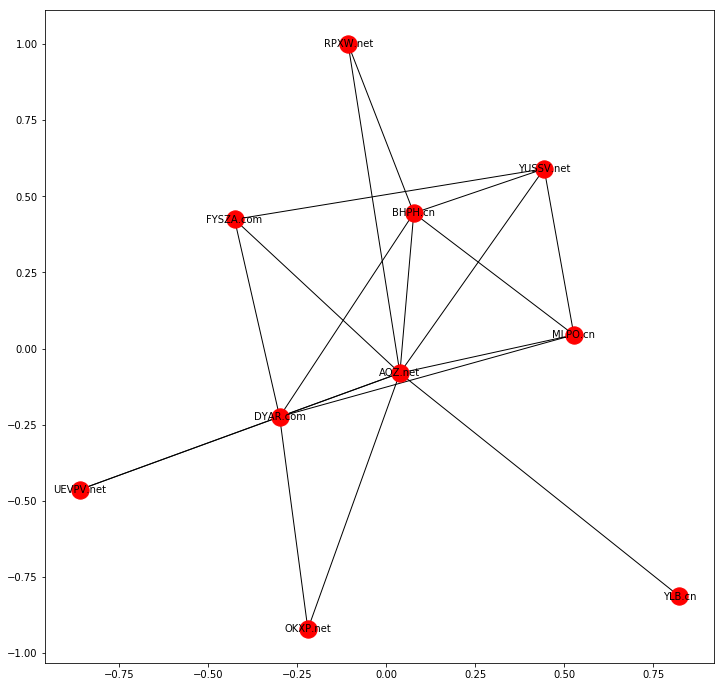

In [178]:
plt.figure(3, figsize=(12, 12))
nx.draw_networkx(website_network, font_size=10)

In [179]:
sorted(nx.pagerank(website_network).items(), key=lambda x: x[1], reverse=True)

[('AQZ.net', 0.23542622677104735),
 ('DYAR.com', 0.16209974855107506),
 ('BHPH.cn', 0.13790414230112918),
 ('YUSSV.net', 0.09592573037252079),
 ('MLPO.cn', 0.09461571874882421),
 ('FYSZA.com', 0.07507932833595764),
 ('OKXP.net', 0.05469501149414421),
 ('UEVPV.net', 0.05469501149414421),
 ('RPXW.net', 0.054547736172011876),
 ('YLB.cn', 0.0350113457591453)]